In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
df_life = pd.read_csv('Data/02_범죄유형별 소년범죄자 생활정도_김유민.csv', encoding='cp949')
df_life.head()

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4
0,No,자료시점,분류,분류,분류,계,하류,중류,상류,미상
1,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료
2,1,2018년,계,계[입력치],계[입력치],"66,142","30,298","28,342",620,"6,882"
3,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","24,345","23,779",537,"5,544"
4,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","14,015","10,723",222,"1,537"


In [5]:
df_life = df_life.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계.1':'하류', '계.2':'중류', '계.3':'상류', '계.4':'미상'})
df_life.head()

,No,자료시점,대분류,중분류,소분류,계,하류,중류,상류,미상
0,No,자료시점,분류,분류,분류,계,하류,중류,상류,미상
1,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료
2,1,2018년,계,계[입력치],계[입력치],"66,142","30,298","28,342",620,"6,882"
3,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","24,345","23,779",537,"5,544"
4,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","14,015","10,723",222,"1,537"


In [6]:
df_life = df_life.drop(['No','자료시점'], axis='columns')
df_life.head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
0,분류,분류,분류,계,하류,중류,상류,미상
1,분류,분류,분류,원자료,원자료,원자료,원자료,원자료
2,계,계[입력치],계[입력치],"66,142","30,298","28,342",620,"6,882"
3,형법범,형법범계[입력치],형법범계[입력치],"54,205","24,345","23,779",537,"5,544"
4,형법범,재산범죄,재산범죄의 계[입력치],"26,497","14,015","10,723",222,"1,537"


In [7]:
df_life = df_life[df_life['대분류']!='분류'].copy()
df_life.head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
2,계,계[입력치],계[입력치],"66,142","30,298","28,342",620,"6,882"
3,형법범,형법범계[입력치],형법범계[입력치],"54,205","24,345","23,779",537,"5,544"
4,형법범,재산범죄,재산범죄의 계[입력치],"26,497","14,015","10,723",222,"1,537"
5,형법범,재산범죄,배임,2,0,0,0,2
6,형법범,재산범죄,사기,"6,968","3,772","2,211",56,929


In [8]:
datas = ['계','하류','중류','상류','미상']

for data in datas:
    df_life[data]=df_life[data].str.replace(',','')
    
df_life.head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
2,계,계[입력치],계[입력치],66142,30298,28342,620,6882
3,형법범,형법범계[입력치],형법범계[입력치],54205,24345,23779,537,5544
4,형법범,재산범죄,재산범죄의 계[입력치],26497,14015,10723,222,1537
5,형법범,재산범죄,배임,2,0,0,0,2
6,형법범,재산범죄,사기,6968,3772,2211,56,929


In [9]:
for data in datas:
    df_life[data] = df_life[data].astype(int)

df_life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 2 to 121
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대분류     120 non-null    object
 1   중분류     120 non-null    object
 2   소분류     120 non-null    object
 3   계       120 non-null    int32 
 4   하류      120 non-null    int32 
 5   중류      120 non-null    int32 
 6   상류      120 non-null    int32 
 7   미상      120 non-null    int32 
dtypes: int32(5), object(3)
memory usage: 6.1+ KB


In [10]:
df_life['대분류'].unique()

array(['계', '형법범', '특별법범'], dtype=object)

# 형법범

In [11]:
df_criminal = df_life[df_life['대분류']=='형법범']
df_criminal.head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
3,형법범,형법범계[입력치],형법범계[입력치],54205,24345,23779,537,5544
4,형법범,재산범죄,재산범죄의 계[입력치],26497,14015,10723,222,1537
5,형법범,재산범죄,배임,2,0,0,0,2
6,형법범,재산범죄,사기,6968,3772,2211,56,929
7,형법범,재산범죄,손괴,940,427,401,11,101


In [12]:
df_criminal_m = df_criminal[df_criminal['중분류']!='형법범계[입력치]']
df_criminal_m.head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
4,형법범,재산범죄,재산범죄의 계[입력치],26497,14015,10723,222,1537
5,형법범,재산범죄,배임,2,0,0,0,2
6,형법범,재산범죄,사기,6968,3772,2211,56,929
7,형법범,재산범죄,손괴,940,427,401,11,101
8,형법범,재산범죄,장물,290,159,118,2,11


In [13]:
df_criminal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 3 to 59
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대분류     57 non-null     object
 1   중분류     57 non-null     object
 2   소분류     57 non-null     object
 3   계       57 non-null     int32 
 4   하류      57 non-null     int32 
 5   중류      57 non-null     int32 
 6   상류      57 non-null     int32 
 7   미상      57 non-null     int32 
dtypes: int32(5), object(3)
memory usage: 2.9+ KB


In [14]:
datas = ['재산범죄', '강력범죄(흉악)','강력범죄(폭력)', '위조범죄', '공무원범죄','풍속범죄','과실범죄','기타형법범죄']

for data in datas:
    df_criminal_m = df_criminal_m[df_criminal_m['소분류']!='%s의 계[입력치]' %data]
    
df_criminal_m.head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
5,형법범,재산범죄,배임,2,0,0,0,2
6,형법범,재산범죄,사기,6968,3772,2211,56,929
7,형법범,재산범죄,손괴,940,427,401,11,101
8,형법범,재산범죄,장물,290,159,118,2,11
9,형법범,재산범죄,절도,16904,8972,7362,141,429


In [15]:
df_criminal_m

,대분류,중분류,소분류,계,하류,중류,상류,미상
5,형법범,재산범죄,배임,2,0,0,0,2
6,형법범,재산범죄,사기,6968,3772,2211,56,929
7,형법범,재산범죄,손괴,940,427,401,11,101
8,형법범,재산범죄,장물,290,159,118,2,11
9,형법범,재산범죄,절도,16904,8972,7362,141,429
10,형법범,재산범죄,횡령,1393,685,631,12,65
12,형법범,강력범죄(흉악),강도,215,141,63,4,7
13,형법범,강력범죄(흉악),방화,110,49,56,2,3
14,형법범,강력범죄(흉악),살인,11,4,5,0,2
15,형법범,강력범죄(흉악),성폭력,3173,1052,1733,55,333


### 하류

<AxesSubplot:xlabel='중분류'>

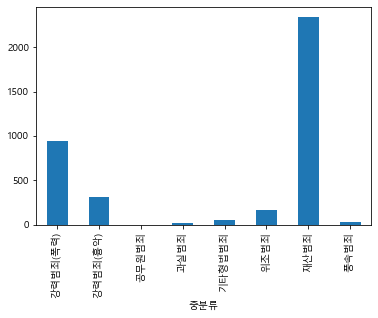

In [16]:
df_criminal_m.groupby('중분류')['하류'].mean().plot.bar()

생활정도가 **하류**인 경우, 재산범죄, 강력범죄(폭력), 강력범죄(흉악) 순서로 높음

<AxesSubplot:xlabel='소분류'>

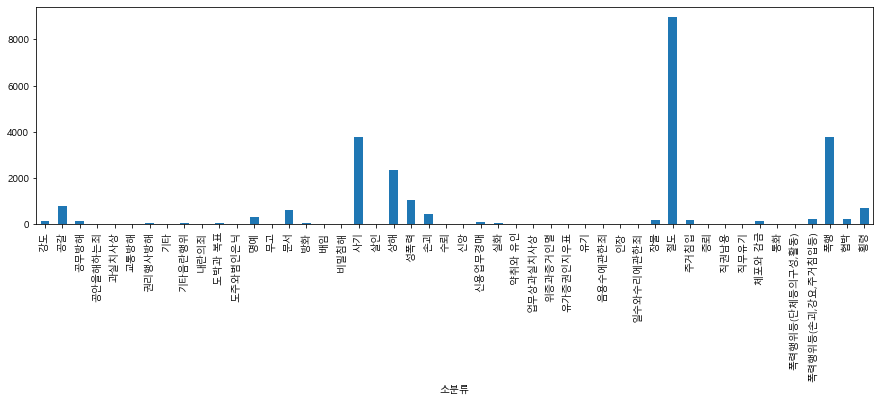

In [17]:
df_criminal_m.groupby('소분류')['하류'].mean().plot.bar(figsize=(15,4))

In [18]:
df_criminal_m.sort_values(by='하류', ascending=False).groupby('소분류').head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
9,형법범,재산범죄,절도,16904,8972,7362,141,429
23,형법범,강력범죄(폭력),폭행,10918,3782,4704,117,2315
6,형법범,재산범죄,사기,6968,3772,2211,56,929
18,형법범,강력범죄(폭력),상해,5483,2328,2877,55,223
15,형법범,강력범죄(흉악),성폭력,3173,1052,1733,55,333
17,형법범,강력범죄(폭력),공갈,1791,803,865,15,108
10,형법범,재산범죄,횡령,1393,685,631,12,65
26,형법범,위조범죄,문서,1465,623,766,18,58
7,형법범,재산범죄,손괴,940,427,401,11,101
50,형법범,기타형법범죄,명예,1407,322,570,13,502


생활정도가 **하류**인 경우, 절도, 폭행, 사기, 상해, 성폭력 순서로 높음

### 중류

<AxesSubplot:xlabel='중분류'>

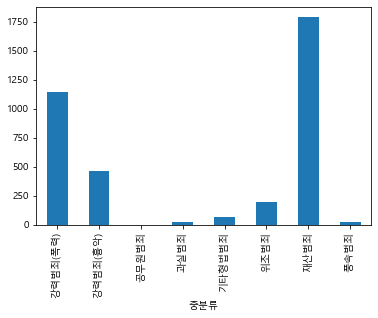

In [19]:
df_criminal_m.groupby('중분류')['중류'].mean().plot.bar()

생활정도가 **중류**인 경우, 재산범죄, 강력범죄(폭력), 강력범죄(흉악) 순서로 높음

<AxesSubplot:xlabel='소분류'>

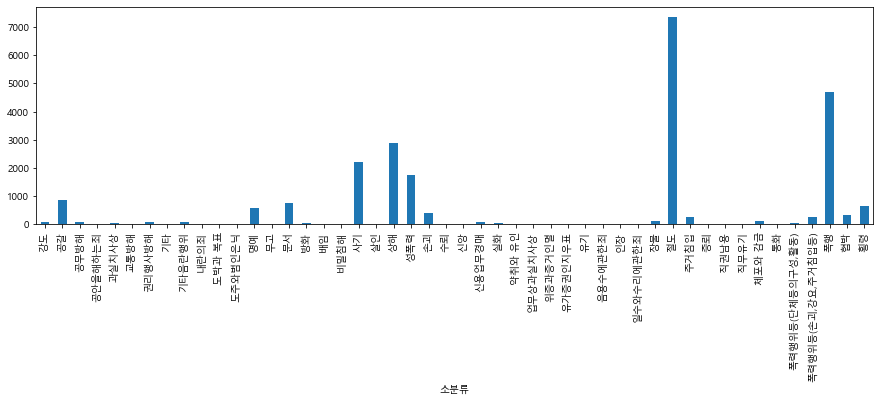

In [20]:
df_criminal_m.groupby('소분류')['중류'].mean().plot.bar(figsize=(15,4))

In [21]:
df_criminal_m.sort_values(by='중류', ascending=False).groupby('소분류').head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
9,형법범,재산범죄,절도,16904,8972,7362,141,429
23,형법범,강력범죄(폭력),폭행,10918,3782,4704,117,2315
18,형법범,강력범죄(폭력),상해,5483,2328,2877,55,223
6,형법범,재산범죄,사기,6968,3772,2211,56,929
15,형법범,강력범죄(흉악),성폭력,3173,1052,1733,55,333
17,형법범,강력범죄(폭력),공갈,1791,803,865,15,108
26,형법범,위조범죄,문서,1465,623,766,18,58
10,형법범,재산범죄,횡령,1393,685,631,12,65
50,형법범,기타형법범죄,명예,1407,322,570,13,502
7,형법범,재산범죄,손괴,940,427,401,11,101


생활정도가 **중류**인 경우, 절도, 폭행, 상해, 사기, 성폭력 순서로 높음

### 상류

<AxesSubplot:xlabel='중분류'>

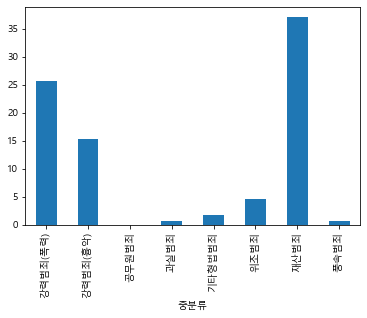

In [22]:
df_criminal_m.groupby('중분류')['상류'].mean().plot.bar()

생활정도가 **상류**인 경우, 재산범죄, 강력범죄(폭력), 강력범죄(흉악) 순서로 높음

<AxesSubplot:xlabel='소분류'>

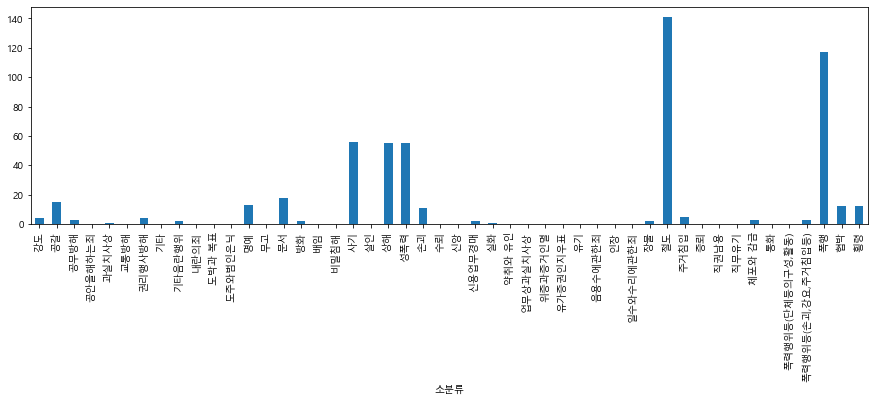

In [23]:
df_criminal_m.groupby('소분류')['상류'].mean().plot.bar(figsize=(15,4))

In [24]:
df_criminal_m.sort_values(by='상류', ascending=False).groupby('소분류').head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
9,형법범,재산범죄,절도,16904,8972,7362,141,429
23,형법범,강력범죄(폭력),폭행,10918,3782,4704,117,2315
6,형법범,재산범죄,사기,6968,3772,2211,56,929
15,형법범,강력범죄(흉악),성폭력,3173,1052,1733,55,333
18,형법범,강력범죄(폭력),상해,5483,2328,2877,55,223
26,형법범,위조범죄,문서,1465,623,766,18,58
17,형법범,강력범죄(폭력),공갈,1791,803,865,15,108
50,형법범,기타형법범죄,명예,1407,322,570,13,502
10,형법범,재산범죄,횡령,1393,685,631,12,65
24,형법범,강력범죄(폭력),협박,706,225,337,12,132


생활정도가 **상류**인 경우, 절도, 폭행, 사기, 성폭력, 상해 순서로 높음

# 특별법범

In [25]:
df_special = df_life[df_life['대분류']=='특별법범']
df_special.head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
60,특별법범,특별법범의 계[입력치],특별법범의 계[입력치],11937,5953,4563,83,1338
61,특별법범,개발제한구역의지정및관리에관한특별조치법,개발제한구역의지정및관리에관한특별조치법,0,0,0,0,0
62,특별법범,개인정보보호법,개인정보보호법,2,1,0,0,1
63,특별법범,건축법,건축법,0,0,0,0,0
64,특별법범,게임산업진흥에관한법률,게임산업진흥에관한법률,89,49,31,0,9


In [26]:
df_special_m = df_special[df_special['소분류']!='특별법범의 계[입력치]']

In [27]:
df_special_m 

,대분류,중분류,소분류,계,하류,중류,상류,미상
61,특별법범,개발제한구역의지정및관리에관한특별조치법,개발제한구역의지정및관리에관한특별조치법,0,0,0,0,0
62,특별법범,개인정보보호법,개인정보보호법,2,1,0,0,1
63,특별법범,건축법,건축법,0,0,0,0,0
64,특별법범,게임산업진흥에관한법률,게임산업진흥에관한법률,89,49,31,0,9
65,특별법범,경범죄처벌법,경범죄처벌법,69,40,23,1,5
...,...,...,...,...,...,...,...,...
117,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2,0,0,0,2
118,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0,0,0,0,0
119,특별법범,예비군법,예비군법,0,0,0,0,0
120,특별법범,화물자동차운수사업법,화물자동차운수사업법,0,0,0,0,0


### 하류

<AxesSubplot:xlabel='소분류'>

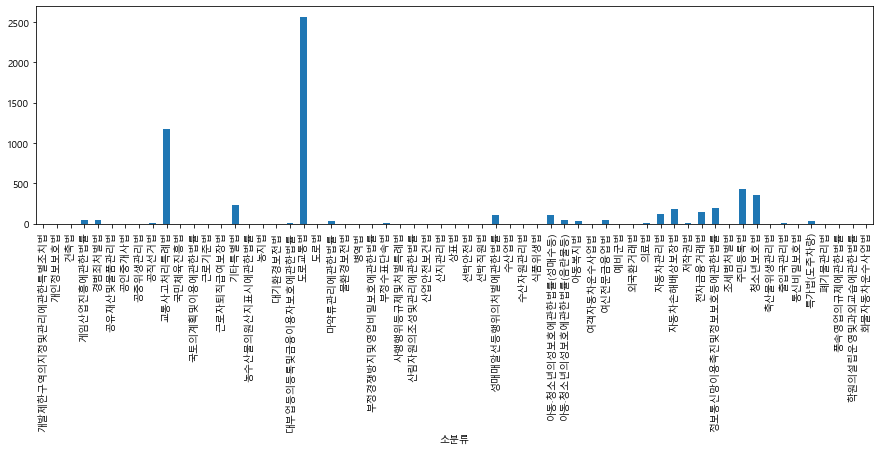

In [28]:
df_special_m.groupby('소분류')['하류'].mean().plot.bar(figsize=(15,4))

In [29]:
df_special_m.sort_values(by='하류', ascending=False).groupby('소분류').head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
79,특별법범,도로교통법,도로교통법,4634,2569,1870,33,162
70,특별법범,교통사고처리특례법,교통사고처리특례법,2577,1175,742,10,650
110,특별법범,주민등록법,주민등록법,958,433,477,9,39
111,특별법범,청소년보호법,청소년보호법,745,362,326,10,47
121,특별법범,기타특별법,기타특별법,475,236,166,1,72
...,...,...,...,...,...,...,...,...
88,특별법범,산지관리법,산지관리법,0,0,0,0,0
89,특별법범,상표법,상표법,7,0,4,1,2
90,특별법범,선박안전법,선박안전법,0,0,0,0,0
93,특별법범,수산업법,수산업법,0,0,0,0,0


생활정도가 **하류**인 경우, 도로교통법, 교통사고처리특례법, 주민등록법, 청소년보호법, 기타특별법 순서로 높음

### 중류

<AxesSubplot:xlabel='소분류'>

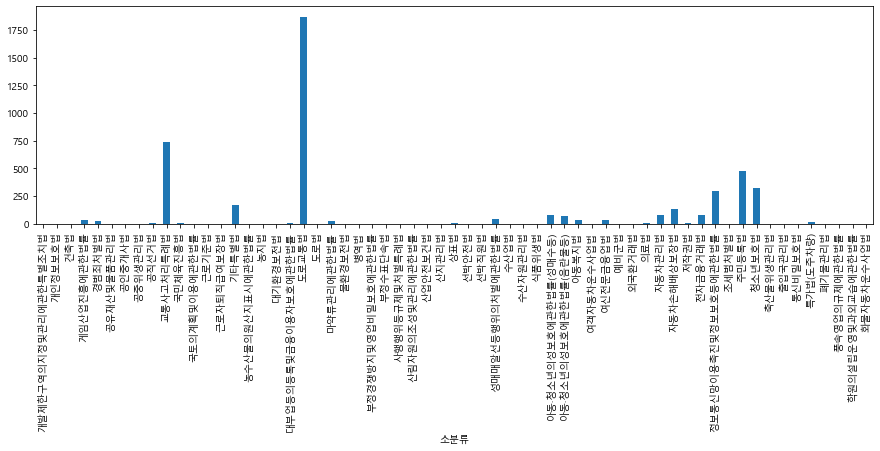

In [30]:
df_special_m.groupby('소분류')['중류'].mean().plot.bar(figsize=(15,4))

In [31]:
df_special_m.sort_values(by='중류', ascending=False).groupby('소분류').head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
79,특별법범,도로교통법,도로교통법,4634,2569,1870,33,162
70,특별법범,교통사고처리특례법,교통사고처리특례법,2577,1175,742,10,650
110,특별법범,주민등록법,주민등록법,958,433,477,9,39
111,특별법범,청소년보호법,청소년보호법,745,362,326,10,47
108,특별법범,정보통신망이용촉진및정보보호등에관한법률,정보통신망이용촉진및정보보호등에관한법률,664,191,299,8,166
...,...,...,...,...,...,...,...,...
90,특별법범,선박안전법,선박안전법,0,0,0,0,0
62,특별법범,개인정보보호법,개인정보보호법,2,1,0,0,1
93,특별법범,수산업법,수산업법,0,0,0,0,0
94,특별법범,수산자원관리법,수산자원관리법,0,0,0,0,0


생활정도가 **중류**인 경우, 도로교통법, 교통사고처리특례법, 주민등록법, 청소년보호법, 정보통신망이용촉진및정보보호등에관한법률 순서로 높음

### 상류

<AxesSubplot:xlabel='소분류'>

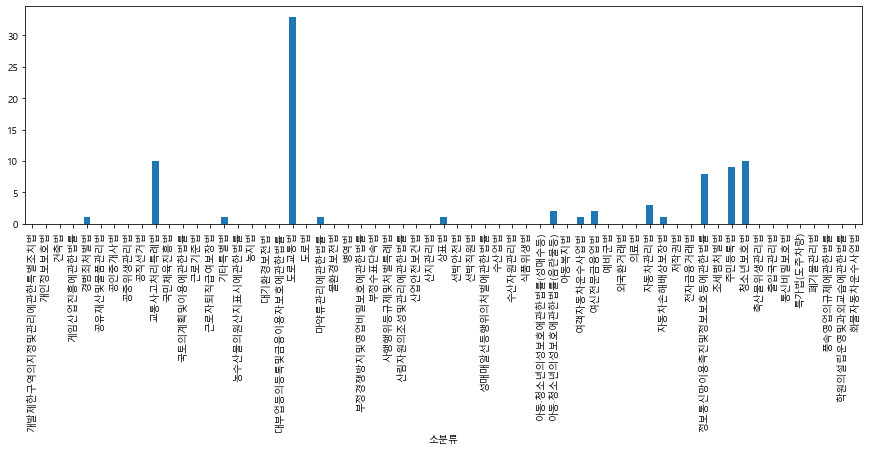

In [32]:
df_special_m.groupby('소분류')['상류'].mean().plot.bar(figsize=(15,4))

In [33]:
df_special_m.sort_values(by='상류', ascending=False).groupby('소분류').head()

,대분류,중분류,소분류,계,하류,중류,상류,미상
79,특별법범,도로교통법,도로교통법,4634,2569,1870,33,162
111,특별법범,청소년보호법,청소년보호법,745,362,326,10,47
70,특별법범,교통사고처리특례법,교통사고처리특례법,2577,1175,742,10,650
110,특별법범,주민등록법,주민등록법,958,433,477,9,39
108,특별법범,정보통신망이용촉진및정보보호등에관한법률,정보통신망이용촉진및정보보호등에관한법률,664,191,299,8,166
...,...,...,...,...,...,...,...,...
87,특별법범,산업안전보건법,산업안전보건법,0,0,0,0,0
88,특별법범,산지관리법,산지관리법,0,0,0,0,0
90,특별법범,선박안전법,선박안전법,0,0,0,0,0
62,특별법범,개인정보보호법,개인정보보호법,2,1,0,0,1


생활정도가 **상류**인 경우,  도로교통법, 청소년보호법, 교통사고처리특례법, 주민등록법, 정보통신망이용촉진및정보보호등에관한 법률 순서로 높음

# 계층별 비교

In [44]:
df_life

,대분류,중분류,소분류,계,하류,중류,상류,미상
2,계,계[입력치],계[입력치],66142,30298,28342,620,6882
3,형법범,형법범계[입력치],형법범계[입력치],54205,24345,23779,537,5544
4,형법범,재산범죄,재산범죄의 계[입력치],26497,14015,10723,222,1537
5,형법범,재산범죄,배임,2,0,0,0,2
6,형법범,재산범죄,사기,6968,3772,2211,56,929
...,...,...,...,...,...,...,...,...
117,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2,0,0,0,2
118,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0,0,0,0,0
119,특별법범,예비군법,예비군법,0,0,0,0,0
120,특별법범,화물자동차운수사업법,화물자동차운수사업법,0,0,0,0,0


In [45]:
df_total = df_life.loc[[2], :]
df_total

,대분류,중분류,소분류,계,하류,중류,상류,미상
2,계,계[입력치],계[입력치],66142,30298,28342,620,6882


In [46]:
df_total.loc[2, '계']

66142

In [47]:
total = df_total.loc[2, '계']


ratio = []

for i in df_total.loc[2]['하류':'상류']:
    ratio.append(i/total*100)
    
print(ratio)

[45.80750506486046, 42.85023132049228, 0.9373771582353119]


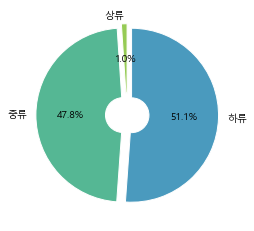

In [59]:
labels = ['하류','중류','상류']
explode = [0.05, 0.05, 0.05]
colors = ['#4A9ABE', '#55B794', '#96CB55'] 
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 1}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()